#  Global Reatail Sales Forecating - TSA

## Importing  necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the data 
data = pd.read_csv('Global+Superstore+Data.csv', encoding = 'unicode_escape')

In [3]:
# Examining the data:
data.head()


,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
# Checking the number of rows and columns in the dataframe
data.shape

(51290, 5)

In [5]:
# Check the column-wise info of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
# checking the dataframe
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [7]:
# Checking the summary for the numeric columns:
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [8]:
# Checking missing valves:
round(100*(data.isnull().sum()/len(data.index)),2)

Order Date    0.0
Segment       0.0
Market        0.0
Sales         0.0
Profit        0.0
dtype: float64

- No missing value is present in data.

In [9]:
# Describing the including objets 
data.describe(include = 'object')

,Order Date,Segment,Market
count,51290,51290,51290
unique,1430,3,7
top,18-06-2014,Consumer,APAC
freq,135,26518,11002


- The data seems to be well spread with 3 Segments and 7 Markets. 
- Segment 'Consumer' and Market 'APAC' seem to be the leading categories
- lets merge the 'Segment' and 'Market' to findout the unique market segment


In [10]:
data['Market_segment'] = data['Segment']+' - '+data['Market']

In [11]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
0,31-07-2012,Consumer,US,2309.650,762.1845,Consumer - US
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,Corporate - APAC
2,17-10-2013,Consumer,APAC,5175.171,919.9710,Consumer - APAC
3,28-01-2013,Home Office,EU,2892.510,-96.5400,Home Office - EU
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Consumer - Africa


In [12]:
# Checking out the unique values 
data.nunique().sort_values()

Segment               3
Market                7
Market_segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

- We can see that there are 7 different geographical market segments and 3 major customer segments and 21 unique market segment 

In [13]:
# Let's visualise these segments to obtain more insights

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


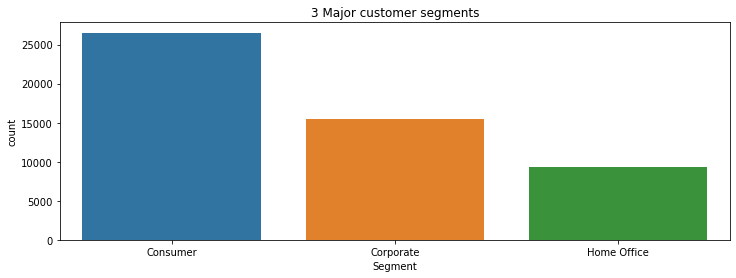

In [14]:
# visualising customer segment
plt.figure(figsize=(12,4))
print(data.Segment.value_counts())
sns.countplot(x='Segment',data=data);
plt.title('3 Major customer segments');

- Counsumers have a heighest number of count 

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


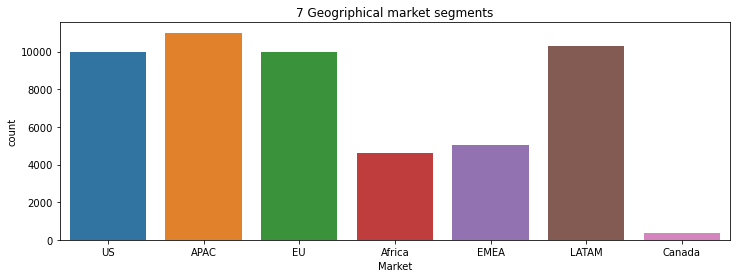

In [15]:
# Visualising 7- Geogriphical market segment
plt.figure(figsize=(12,4))
print(data.Market.value_counts())
sns.countplot(x='Market',data=data);
plt.title('7 Geogriphical market segments');


- APAC have a highest count 

Consumer - APAC         5699
Consumer - LATAM        5321
Consumer - US           5191
Consumer - EU           5186
Corporate - APAC        3283
Corporate - EU          3077
Corporate - LATAM       3053
Corporate - US          3020
Consumer - EMEA         2538
Consumer - Africa       2381
Home Office - APAC      2020
Home Office - LATAM     1920
Home Office - US        1783
Home Office - EU        1737
Corporate - EMEA        1574
Corporate - Africa      1312
Home Office - EMEA       917
Home Office - Africa     894
Consumer - Canada        202
Corporate - Canada       110
Home Office - Canada      72
Name: Market_segment, dtype: int64


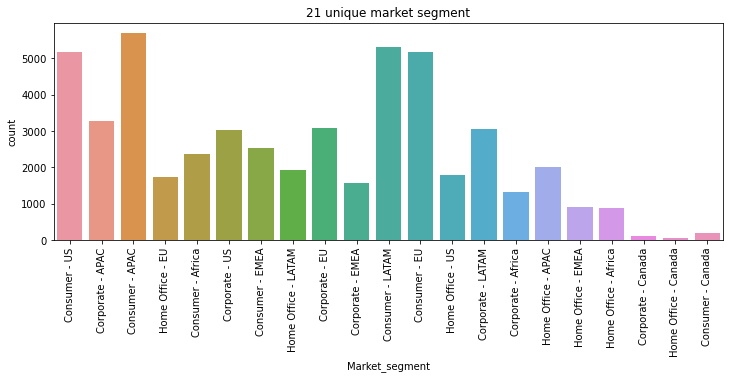

In [16]:
# Visualising  21 unique market segment
plt.figure(figsize=(12,4))
print(data.Market_segment.value_counts())
sns.countplot(x='Market_segment',data=data);
plt.title('21 unique market segment');

plt.xticks(rotation = 90);

- From here we can say that Consumer - APAC has highest counts

In [17]:
# Lets check the profit and sales market and segment wise

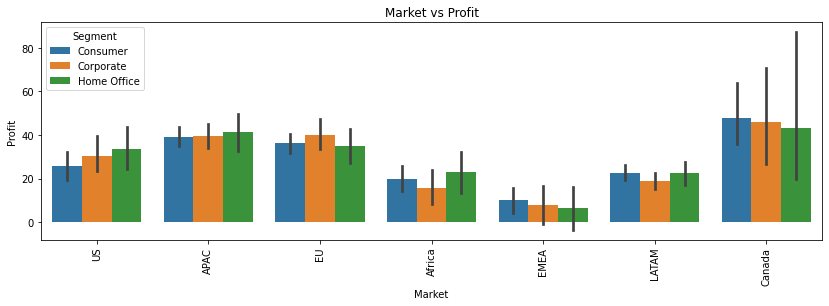

In [18]:
# Market VS Profit
plt.figure(figsize=(14,4))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=data)
plt.title('Market vs Profit')
plt.xticks(rotation = 90);


- From the graph we can see that canada and APAC generates a good amount of profit in all the three segments

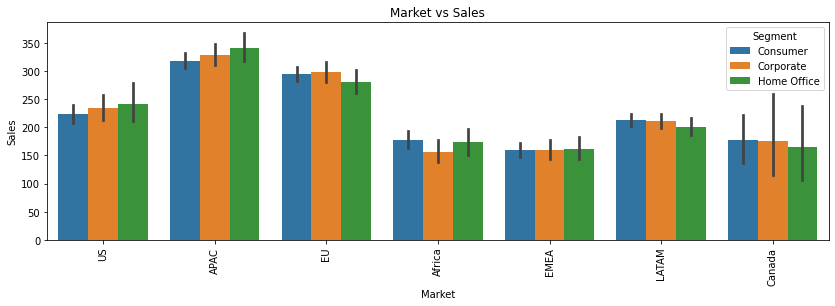

In [19]:
# Market VS Sales
plt.figure(figsize=(14,4))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=data)
plt.title('Market vs Sales')
plt.xticks(rotation = 90);


- from here we can say that APAC has the highe no. of sales in all the three segments

In [20]:
# Market_segment VS Sales and profit

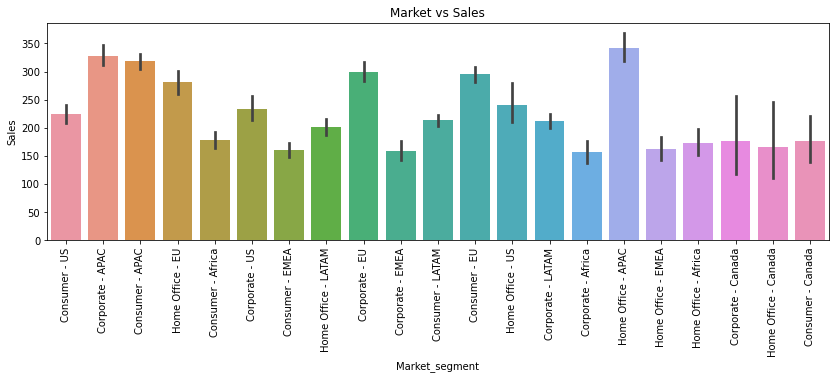

In [21]:
# Market_segment VS Sales
plt.figure(figsize=(14,4))
sns.barplot(x='Market_segment', y= 'Sales', data=data)
plt.title('Market vs Sales')
plt.xticks(rotation = 90);


- Here Home office -APAC has highest number of sales

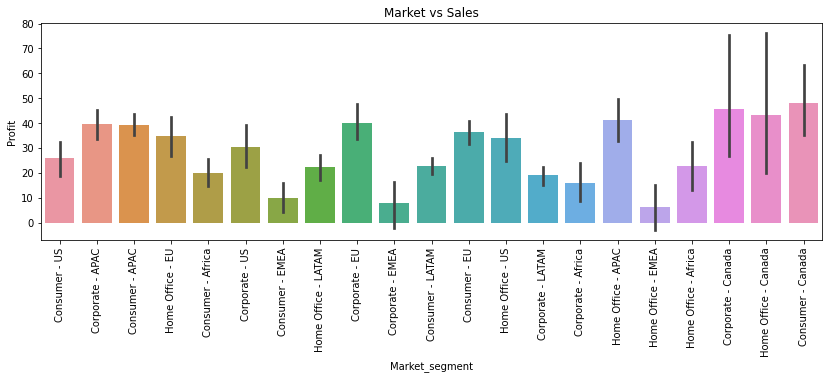

In [22]:
# Market_segment VS Sales
plt.figure(figsize=(14,4))
sns.barplot(x='Market_segment', y= 'Profit', data=data)
plt.title('Market vs Sales')
plt.xticks(rotation = 90);

- Here the most profitable market is Canada

In [23]:
# Let's convert the order-date into a date-time format for getting it into the Month-year format
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('M')
data = data.sort_values(by = ['Order Date'])

In [24]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_segment
15262,2011-01,Corporate,EU,139.65,15.30,Corporate - EU
26744,2011-01,Consumer,EU,88.44,15.84,Consumer - EU
48614,2011-01,Corporate,EU,11.43,4.11,Corporate - EU
9417,2011-01,Consumer,LATAM,491.00,122.70,Consumer - LATAM
48590,2011-01,Home Office,US,4.71,0.00,Home Office - US


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Segment         51290 non-null  object   
 2   Market          51290 non-null  object   
 3   Sales           51290 non-null  float64  
 4   Profit          51290 non-null  float64  
 5   Market_segment  51290 non-null  object   
dtypes: float64(2), object(3), period[M](1)
memory usage: 2.7+ MB


In [26]:
# Lets drop market and segment column 

data=data.drop(['Market','Segment'],axis= 'columns')
data.head()

,Order Date,Sales,Profit,Market_segment
15262,2011-01,139.65,15.30,Corporate - EU
26744,2011-01,88.44,15.84,Consumer - EU
48614,2011-01,11.43,4.11,Corporate - EU
9417,2011-01,491.00,122.70,Consumer - LATAM
48590,2011-01,4.71,0.00,Home Office - US


- Now we are monthly aggregating the transaction data

In [27]:
# Aggregating the data 
data_profit = data.pivot_table(values='Profit',
    index='Order Date',
    columns='Market_segment',
    aggfunc='sum')

In [28]:
data_profit.head()

Market_segment,Consumer - APAC,Consumer - Africa,Consumer - Canada,Consumer - EMEA,Consumer - EU,Consumer - LATAM,Consumer - US,Corporate - APAC,Corporate - Africa,Corporate - Canada,...,Corporate - EU,Corporate - LATAM,Corporate - US,Home Office - APAC,Home Office - Africa,Home Office - Canada,Home Office - EMEA,Home Office - EU,Home Office - LATAM,Home Office - US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [29]:
data_profit.shape

(48, 21)

###  Train_Test_Split the data

In [30]:
# performing the train-test split such that we take the 42 months as the train data and the 6 months as the test data.

In [31]:
train_len = 42
train = data_profit[:train_len]
test = data_profit[train_len:]

In [32]:
# Checking the sahpe of the train set and the test set 

In [33]:
print(train.shape, test.shape)

(42, 21) (6, 21)


###  Finding the most consitently profitable Market-Segment using CoV

- We compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
- We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [34]:
# Calculating the Cov with the formula of CoV = std/mean and shorting the data.

mean=round(np.mean(train),2)
std= round(np.std(train),2)

CoV_data= pd.DataFrame(mean)
CoV_data.columns = ['Mean']
CoV_data['std']= std
CoV_data.columns = ['Mean','Std']
CoV_data['CoV'] = std/mean
CoV_data.columns = ['Mean','Std','CoV']
CoV_data= CoV_data.reset_index()
CoV_data.sort_values(by='CoV', ascending= True, inplace = True)
CoV_data.head()

,Market_segment,Mean,Std,CoV
0,Consumer - APAC,4400.89,2300.46,0.522726
7,Corporate - APAC,2574.92,1364.84,0.530051
4,Consumer - EU,3699.98,2202.28,0.595214
5,Consumer - LATAM,2295.56,1569.63,0.683768
11,Corporate - EU,2216.30,1600.34,0.722077


In [35]:
CoV_data

,Market_segment,Mean,Std,CoV
0,Consumer - APAC,4400.89,2300.46,0.522726
7,Corporate - APAC,2574.92,1364.84,0.530051
4,Consumer - EU,3699.98,2202.28,0.595214
5,Consumer - LATAM,2295.56,1569.63,0.683768
11,Corporate - EU,2216.30,1600.34,0.722077
12,Corporate - LATAM,1122.63,990.36,0.882178
18,Home Office - EU,1224.46,1148.63,0.938071
14,Home Office - APAC,1511.09,1523.51,1.008219
6,Consumer - US,2686.74,2715.03,1.010529
13,Corporate - US,1754.20,1880.20,1.071828


In [36]:
Lowest_CoV_value =min(CoV_data["CoV"])
Lowest_CoV_value

0.5227260849509985

- Lowest Cov value is of Consumer - APAC

In [37]:
highest_CoV_value =max(CoV_data["CoV"])
highest_CoV_value

7.732161937551941

- highest CoV values is of Home Office -EMEA

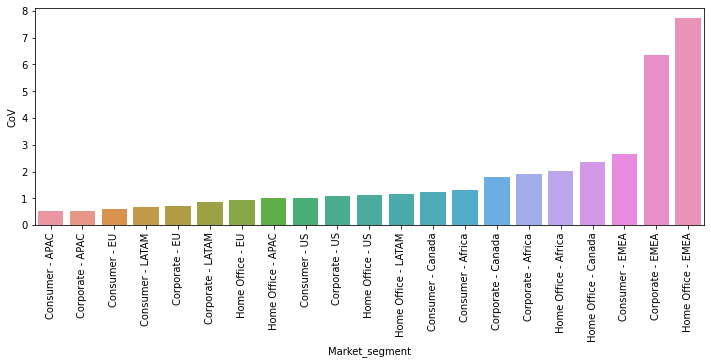

In [38]:
# Visualising the data 
plt.figure(figsize=(12,4))
sns.barplot(x='Market_segment', y= 'CoV', data=CoV_data)
plt.xticks(rotation = 90)
plt.show();

- We can see that Lowest CoV is 0.52272
- Considering we are focussing on only one Market_segment which is profitable with least variation in Profits, we chose APAC-Consumer. Because of lowest CoV, we want to estimate sales for the most consistently profitable Market_segment, so that our sales forecasts are reliable.

# Filtereing  the data for Best Market Segment i.e. APAC Consumer

- Convert the Order-Date column from "DateTime" to "timestamp" from the 'data' DataFrame

In [39]:
data['Order Date'] = data['Order Date'].astype(str)
data['Order Date']=pd.to_datetime(data['Order Date'])

In [40]:
#Rechecking the infor of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Sales           51290 non-null  float64       
 2   Profit          51290 non-null  float64       
 3   Market_segment  51290 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ MB


In [41]:
data.head()

,Order Date,Sales,Profit,Market_segment
15262,2011-01-01,139.65,15.30,Corporate - EU
26744,2011-01-01,88.44,15.84,Consumer - EU
48614,2011-01-01,11.43,4.11,Corporate - EU
9417,2011-01-01,491.00,122.70,Consumer - LATAM
48590,2011-01-01,4.71,0.00,Home Office - US


In [42]:
data_APAC= data[(data.Market_segment=='Consumer - APAC')]
data_APAC.shape

(5699, 4)

In [43]:
data_APAC.head()

,Order Date,Sales,Profit,Market_segment
1080,2011-01-01,1429.050,371.490,Consumer - APAC
9203,2011-01-01,219.780,59.340,Consumer - APAC
19331,2011-01-01,342.510,54.600,Consumer - APAC
26270,2011-01-01,102.762,1.842,Consumer - APAC
14830,2011-01-01,420.420,147.000,Consumer - APAC


-  Let's aggregate Sales by month.
-  And storing it to a new variable APAC

In [44]:
APAC=pd.DataFrame(data_APAC.groupby("Order Date")['Sales'].sum())
APAC.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [45]:
APAC.shape

(48, 1)

In [46]:
APAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


# Time series Analysis

#### Plotting  time series data

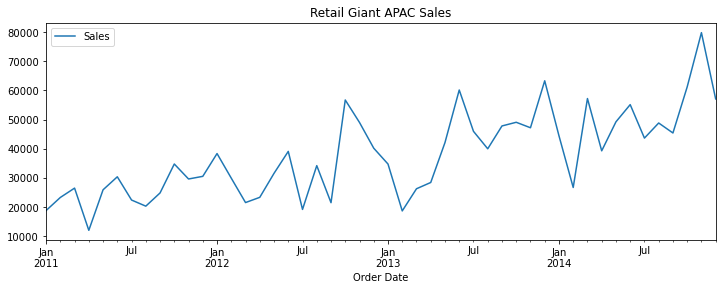

In [47]:
APAC.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant APAC Sales')
plt.show(block=False)

In [48]:
# Checking the null values
APAC.isnull().sum()

Sales    0
dtype: int64

- There is no null value 

## Outlier detection

### Box plot and interquartile range

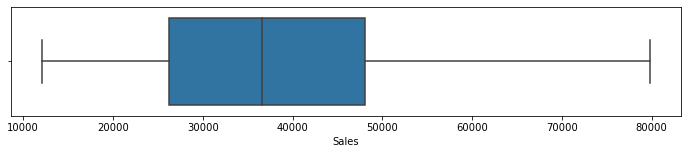

In [49]:

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=APAC['Sales'],whis=1.5)

- look like there is no outlier in the data 

## Time series Decomposition

### Additive seasonal decomposition

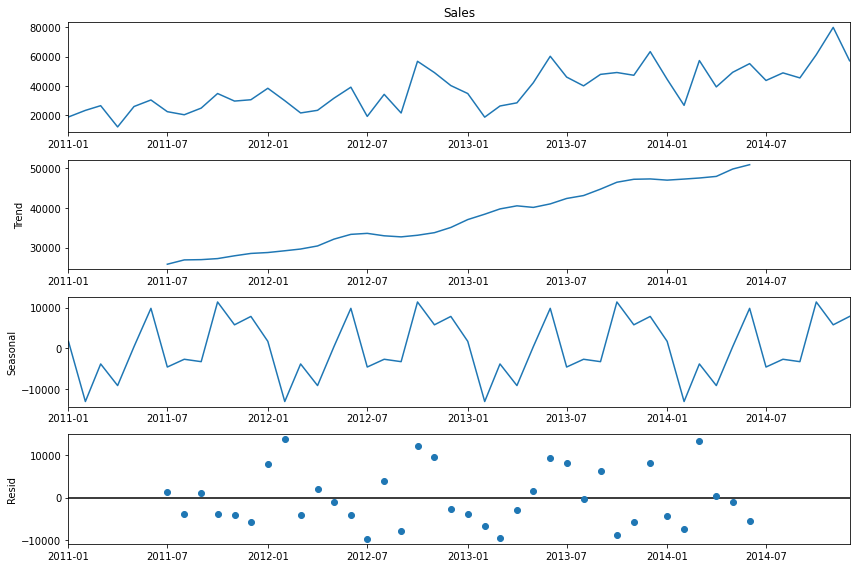

In [50]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(APAC.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

- Upward trend  and seasonality  present in the dataset

- The residuals seem to have some pattern

### Multiplicative seasonal decomposition


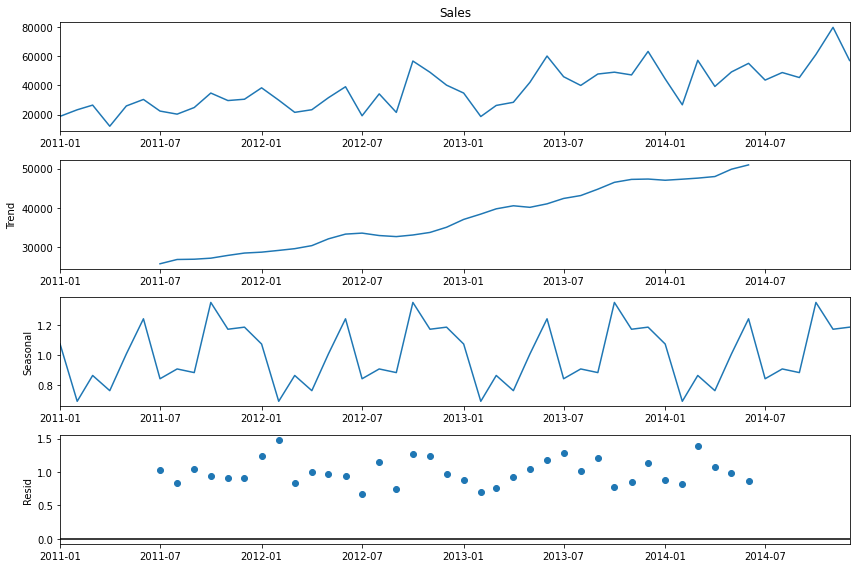

In [51]:
decomposition = sm.tsa.seasonal_decompose(APAC.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

- Upward trend and seasonality present in the dataset

- The Residuals seem to be randomly distributed

# Building  and evaluating  time series forecast

### Split time series data into training and test set

In [52]:
APAC_train = APAC[:train_len]
APAC_test = APAC[train_len:]

In [53]:
#Rechecking the shape of the data
print(APAC_train.shape, APAC_test.shape)

(42, 1) (6, 1)


# Smoothing Techniques


- With the above analysis it is clear that there is upward Trend and Seasonality in data, we can use following Smoothing techniques.

- Simple Exponential Smoothing
- Holt’s Exponential Smoothing
- Holt Winter’s Additive Smoothing
- Holt Winter’s Multiplicative Smoothing

## Simple exponential smoothing

In [54]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(APAC_train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = APAC_test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

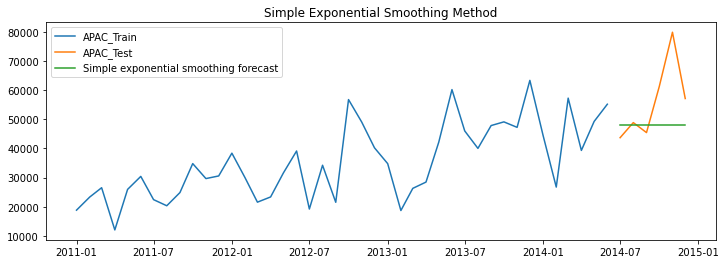

In [55]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

- Calculating Errors in Forecasted series, using RMSE and MAPE

In [56]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_ses['ses_forecast'])/APAC_test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })

results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83


- We observe that Simple Exponential Smoothing gives us a flat estimate for the next six months and does not take care of movements within the months.

- The RMSE is 14764.66 and MAPE is 15.83

## Holt's method with trend

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(APAC_train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = APAC_test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(APAC_test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

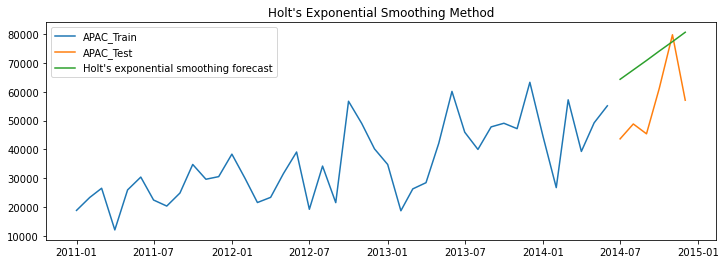

In [58]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

- We observe that Holt’s Exponential Smoothing with Trend gives us an upward trending estimate for the next six months, however, does not take care of movements within the months.

### Calculate RSME and MAPE

In [59]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_holt['holt_forecast'])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57


- The RMSE is 18976.37 and MAPE is 34.57

## Holt Winter's additive method with trend and seasonality

In [60]:
y_hat_hwa = APAC_test.copy()
model = ExponentialSmoothing(np.asarray(APAC_train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.026947915865424013, 'smoothing_slope': 0.026947914467738976, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30370.902628725915, 'initial_slope': 649.8325776031381, 'initial_seasons': array([ -9506.65873936, -19508.53724838, -12046.60418522, -19969.23736381,
        -9232.90515972,  -1016.67002323, -14185.4541823 , -12965.61452643,
       -13290.99275988,   1024.668988  ,  -4575.22686286,  -2683.50853795]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

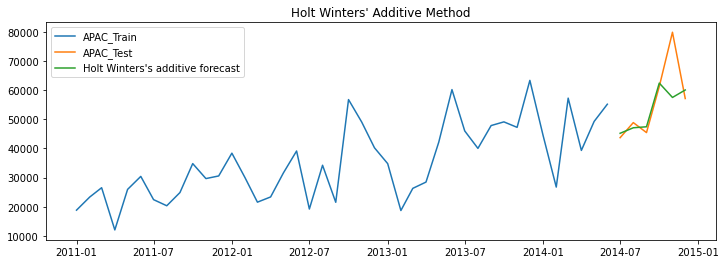

In [61]:
plt.figure(figsize=(12,4))
plt.plot( APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

- We can see that we are able to capture the seasonal variation as well as the trend
- Calculating Errors in Forecasted series, using RMSE and MAPE

In [62]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_hwa['hw_forecast'])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76


- The RMSE is 9304.37 and MAPE is 7.76
- This model is better than both Simple Exponential as well as Holt’s Exponential Smoothing techniques.

## Holt Winter's multiplicative method with trend and seasonality

In [63]:
y_hat_hwm = APAC_test.copy()
model = ExponentialSmoothing(np.asarray(APAC_train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0001743699162834022, 'smoothing_slope': 0.00017436800205013333, 'smoothing_seasonal': 0.0005273030415577813, 'damping_slope': nan, 'initial_level': 34110.96532936017, 'initial_slope': 730.4169702967649, 'initial_seasons': array([0.71316265, 0.48521395, 0.68070858, 0.52962281, 0.7385419 ,
       0.901911  , 0.62145787, 0.6545268 , 0.64684965, 0.93184221,
       0.8270268 , 0.88324517]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

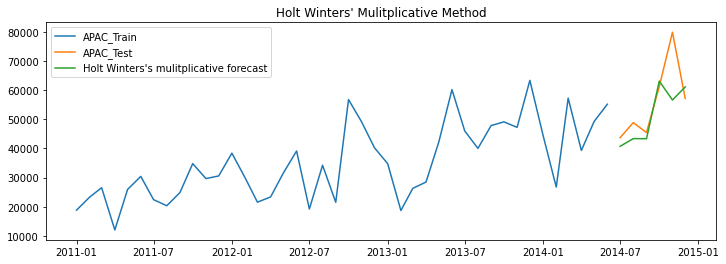

In [64]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

#### Calculate RMSE and MAPE

In [65]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_hwm['hw_forecast'])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30


- The RMSE is 10021.79 and MAPE is 10.30
- It is better than Simple Exponential and Holt’s Exponential but not as good as Holt Winter’s Additive Smoothing.

#### Among the 4 Smoothing techniques, Holt Winter’s Additive Method has the least MAPE and hence, the best Smoothing technique for the given Time-Series data

# Auto Regressive methods

- Let's visualise the the data set

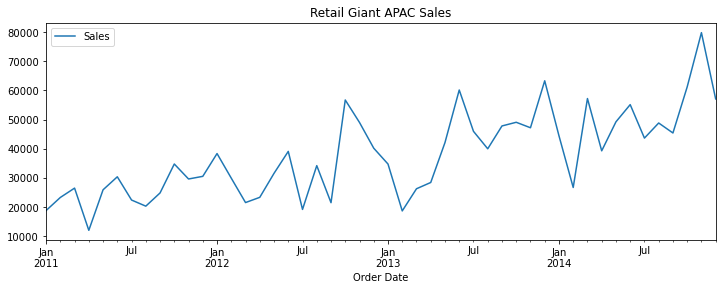

In [66]:
APAC['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant APAC Sales')
plt.show(block=False)

- Before proceeding towards ARIMA methods, we will check for Stationarity of the Time-Series

- If the Time-Series is not Stationary, we need to transform it in order to make it Stationary

- To validate wether the Time Series possesses Stationarity or not, we will perform couple of statistical tests, namely ADF and KPSS.


- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

    -Null Hypothesis (H0): The series is stationary.
    
    -p−value>0.05.
    
    -Alternate Hypothesis (H1): The series is not stationary.
    
    -p−value≤0.05.
    
    
- Augmented Dickey-Fuller (ADF) Test

    -Null Hypothesis (H0): The series is not stationary.
    
    -p−value>0.05.
    
    -Alternate Hypothesis (H1): The series is stationary.
    
    -p−value≤0.05.

   

### Stationarity vs non-stationary time series

#### Augmented Dickey-Fuller (ADF) test

In [67]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(APAC['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


-  p-value is 0.011, which is less than 0.05
- So we fail to reject the null hypothesis  (H0) i.e., the series is stationary

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [68]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(APAC['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


- p-value is 0.024, which is less than 0.05
- So we reject the null hypothesis (H0) i.e., the series is not stationary


- We need the series to have Stationarity and auto corelated, hence we need to transform the series. We will use Box Cox Transformation and Differencing for this and will check the Stationarity once again using ADF and KPSS methods.

###  Box Cox transformation to make variance constant

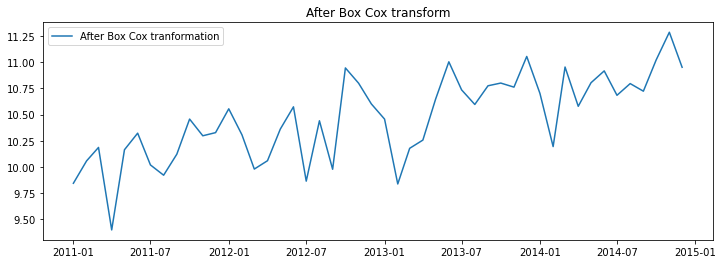

In [69]:
from scipy.stats import boxcox
APAC_boxcox = pd.Series(boxcox(APAC['Sales'], lmbda=0), index = APAC.index)

plt.figure(figsize=(12,4))
plt.plot(APAC_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

##### Differencing APAC_data to remove trend


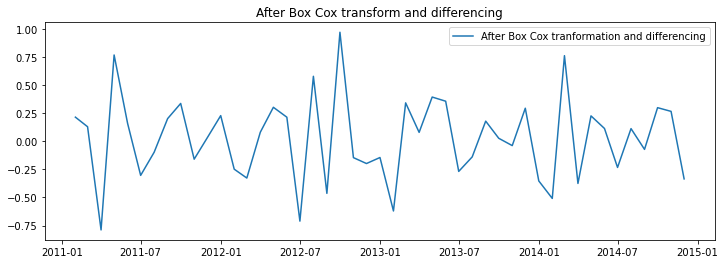

In [70]:
APAC_boxcox_diff = pd.Series(APAC_boxcox - APAC_boxcox.shift(), APAC.index)
plt.figure(figsize=(12,4))
plt.plot(APAC_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [71]:
APAC_boxcox_diff.dropna(inplace=True)

In [72]:
APAC_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

- Now the series looks Stationary.
- The mean is also centered around zero.
- Lets perform the ADF and KPSS test to check the stationarity of the transformed APAC data 

#### Augmented Dickey-Fuller (ADF) test


In [73]:
adf_test = adfuller(APAC_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


- p-value is 0.00017 < 0.05, Reject the null hypothesis  (H0) i.e. The series is stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [74]:
kpss_test = kpss(APAC_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


- p-value is 0.10 > 0.05, fail to  Reject the null hypothesis (H0) i.e. The series is stationary

### As per the given, we do not have to plot the PACF and the ACF values and can directly use p=1, q=1 and d=1 as the forecasts are relatively better for these values

- Forecasting the sales for the most profitable market segment using the following:

- AR model
- MA model
- ARMA model
- ARIMA model
- SARIMA model

In [75]:
# We will split the boxcox series into train and test series

In [76]:
train_data_boxcox = APAC_boxcox[:train_len]
test_data_boxcox = APAC_boxcox[train_len:]
train_data_boxcox_diff = APAC_boxcox_diff[:train_len-1]
test_data_boxcox_diff = APAC_boxcox_diff[train_len-1:]

In [77]:
train_data_boxcox_diff.head()

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
dtype: float64

###   Auto Regressive (AR) Model

In [78]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


#### Recover original time series

In [79]:
y_hat_ar = APAC_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

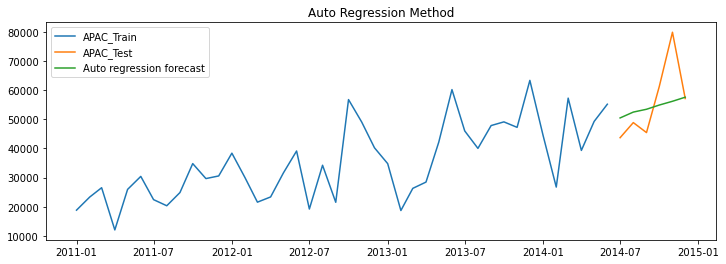

In [80]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_ar['ar_forecast'][APAC_test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculating RMSE and MAPE

In [81]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_ar['ar_forecast'][APAC_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_ar['ar_forecast'][APAC_test.index.min():])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56


### Moving average method (MA)

In [82]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [83]:
y_hat_ma = APAC_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

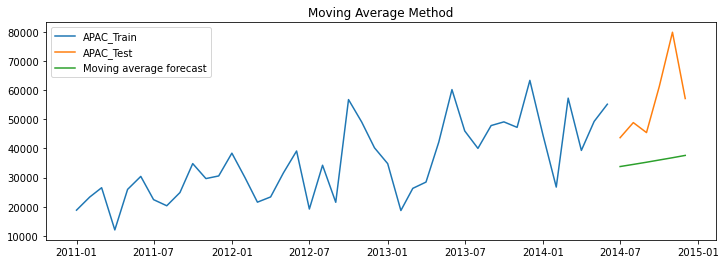

In [84]:
plt.figure(figsize=(12,4))
plt.plot(APAC['Sales'][:train_len], label='APAC_Train')
plt.plot(APAC['Sales'][train_len:], label='APAC_Test')
plt.plot(y_hat_ma['ma_forecast'][APAC_test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [85]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_ma['ma_forecast'][APAC_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_ma['ma_forecast'][APAC_test.index.min():])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


## Auto regression moving average method (ARMA)

In [86]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


#### Recover original time series


In [87]:
y_hat_arma = APAC_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

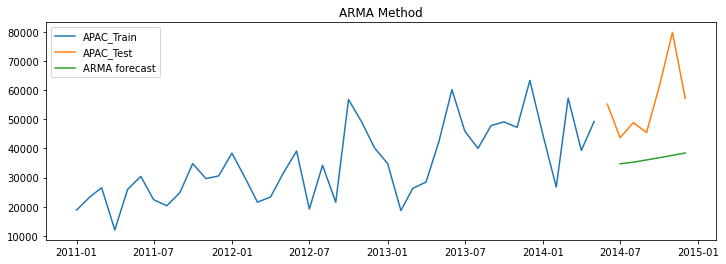

In [88]:
plt.figure(figsize=(12,4))
plt.plot( APAC['Sales'][:train_len-1], label='APAC_Train')
plt.plot(APAC['Sales'][train_len-1:], label='APAC_Test')
plt.plot(y_hat_arma['arma_forecast'][APAC_test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [89]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Auto regressive integrated moving average (ARIMA)

In [90]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [91]:
y_hat_arima = APAC_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(APAC_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

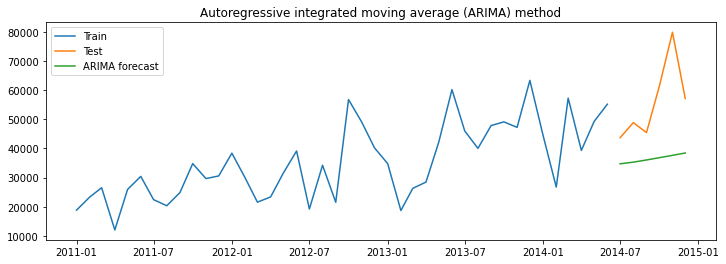

In [92]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='Train')
plt.plot(APAC_test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][APAC_test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAP

In [93]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_arima['arima_forecast'][APAC_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_arima['arima_forecast'][APAC_test.index.min():])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


## Seasonal auto regressive integrated moving average (SARIMA)

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.042087
ma.L1      -0.996570
ar.S.L12    0.098631
ma.S.L12   -0.967648
sigma2      0.058484
dtype: float64


### Recover original time series forecast

In [95]:
y_hat_sarima = APAC_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(APAC_boxcox_diff.index.min(), APAC_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

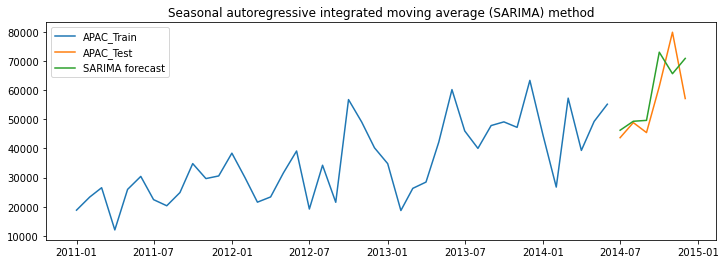

In [96]:
plt.figure(figsize=(12,4))
plt.plot(APAC_train['Sales'], label='APAC_Train')
plt.plot(APAC_test['Sales'], label='APAC_Test')
plt.plot(y_hat_sarima['sarima_forecast'][APAC_test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [97]:
rmse = np.sqrt(mean_squared_error(APAC_test['Sales'], y_hat_sarima['sarima_forecast'][APAC_test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(APAC_test['Sales']-y_hat_sarima['sarima_forecast'][APAC_test.index.min():])/APAC_test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14764.66,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9304.48,7.76
0,Holt Winters' multiplicative method,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9612.36,12.86


- RMSE= 9612.36 and MAPE = 12.86 which is the least among all the methods done.
- So, we can conclude that among all the methods done in the ARIMA above,  SARIMA method is able to predict the sales closer to the actual values


### Conclusion
- From here we can conclude that, Holt Winters additive method is the best forecasting method in the smoothing technique.
- And SARIMA model is the best method in ARIMA set of techniques.